In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read report file
report = pd.read_csv("Full-Report.csv", index_col="dataset")

In [3]:
report.head()

,train_size,test_size,time_series_length,n_features_per_timestep,n_classes,normalized_train_classes_entropy,raw_train_silhouette,raw_test_silhouette,one_ed_acc,three_ed_acc,...,best_dtw,embedded_train_silhouette,std_embedded_train_silhouette,embedded_test_silhouette,std_embedded_test_silhouette,one_embedded_acc,std_one_embedded_acc,three_embedded_acc,std_three_embedded_acc,best_embedded
dataset,,,,,,,,,,,,,,,,,,,,,
WormsTwoClass,181,77,900,1,2,0.9814,0.0050,-0.0023,0.6104,0.5325,...,0.6104,0.3409,0.2225,0.0020,0.0290,0.5671,0.0534,0.5498,0.0429,0.5671
ShapeletSim,20,180,500,1,2,0.9993,0.0018,-0.0005,0.4924,0.4924,...,0.6894,0.7584,0.0052,-0.0068,0.0010,0.4722,0.0217,0.4949,0.0071,0.4949
Earthquakes,322,139,512,1,2,0.6803,0.0004,0.0002,0.7122,0.6978,...,0.7338,0.8843,0.0163,0.1751,0.0371,0.7170,0.0391,0.7602,0.0237,0.7602
ToeSegmentation1,40,228,277,1,2,1.0000,-0.0067,0.0014,0.6798,0.6053,...,0.7982,0.8662,0.0292,0.1717,0.1777,0.6857,0.1324,0.6842,0.1303,0.6857
Computers,250,250,720,1,2,1.0000,-0.0005,0.0093,0.5760,0.6200,...,0.6720,0.5306,0.0571,0.0591,0.0181,0.5973,0.0262,0.6053,0.0303,0.6053


# Silhouette Analysis
## Training

In [4]:
# Train silhouette improvement in how many datasets?
(report["embedded_train_silhouette"] > report["raw_train_silhouette"]).value_counts(normalize=True)

True     0.9375
False    0.0625
dtype: float64

Text(0.5, 0, 'silhouette')

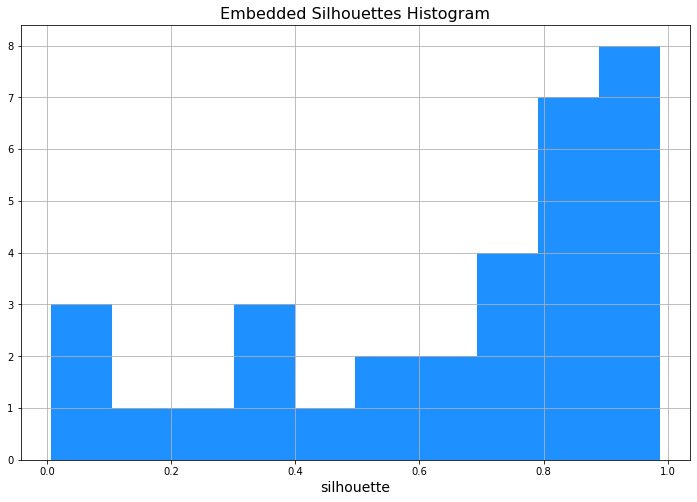

In [5]:
report["embedded_train_silhouette"].hist(bins=10, color="dodgerblue", figsize=(12, 8))
plt.title("Embedded Silhouettes Histogram", fontsize=16)
plt.xlabel("silhouette", fontsize=14)

Text(0.5, 0, 'improvement')

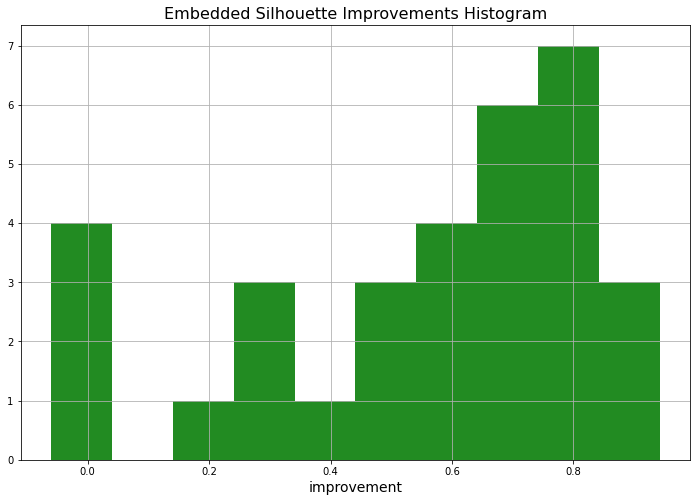

In [7]:
(report["embedded_train_silhouette"] - report["raw_train_silhouette"]).hist(bins=10, color="forestgreen", figsize=(12, 8))
plt.title("Embedded Silhouette Improvements Histogram", fontsize=16)
plt.xlabel("improvement", fontsize=14)

## Test

In [8]:
# Test silhouette improvement in how many datasets?
(report["embedded_test_silhouette"] > report["raw_test_silhouette"]).value_counts(normalize=True)

True     0.84375
False    0.15625
dtype: float64

Text(0.5, 0, 'silhouette')

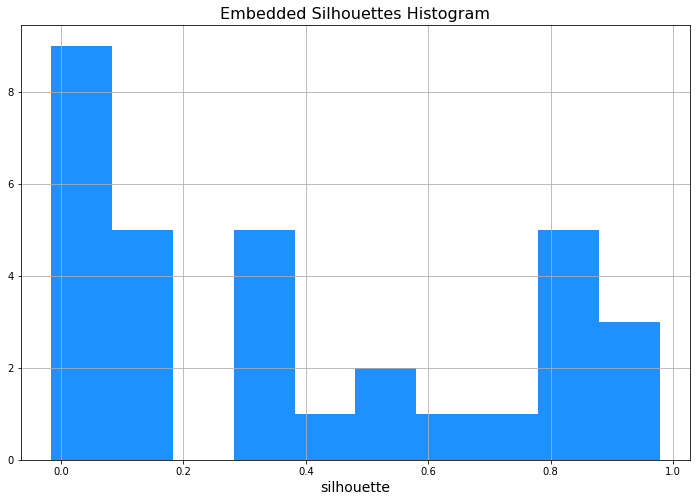

In [9]:
report["embedded_test_silhouette"].hist(bins=10, color="dodgerblue", figsize=(12, 8))
plt.title("Embedded Silhouettes Histogram", fontsize=16)
plt.xlabel("silhouette", fontsize=14)

Text(0.5, 0, 'improvement')

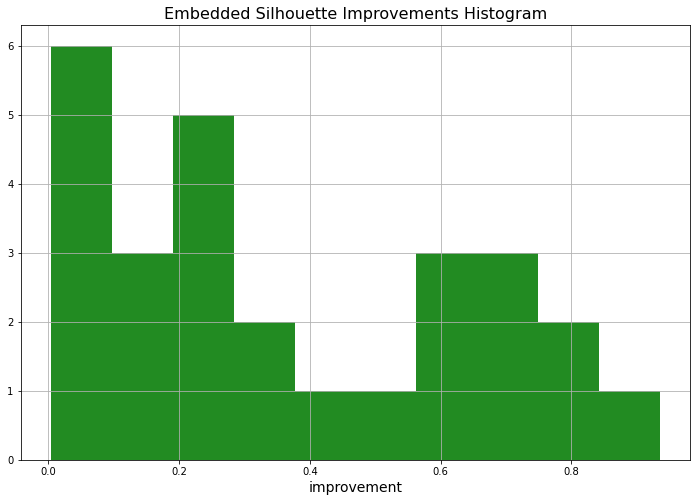

In [10]:
increased_silhouette_datasets = report[report["embedded_test_silhouette"] > report["raw_test_silhouette"]]
(increased_silhouette_datasets["embedded_test_silhouette"] - increased_silhouette_datasets["raw_test_silhouette"]).hist(bins=10, color="forestgreen", figsize=(12, 8))
plt.title("Embedded Silhouette Improvements Histogram", fontsize=16)
plt.xlabel("improvement", fontsize=14)

# Approaches Comparison

In [11]:
def compare_acc(a, b, a_name=None, b_name=None):

    """
    Auxiliary function to extract comparison metrics between two approaches (a and b).
    """

    true_perc = (a > b).value_counts(normalize=True).loc[True]
    print(f"{a_name} is better than {b_name} in {true_perc * 100:.2f} of datasets.")
    
    plt.figure(figsize=(9, 8))
    plt.scatter(b, a, color="orangered")
    plt.plot(np.linspace(0, 1, 1000), np.linspace(0, 1, 1000), color="black", linestyle="--")
    plt.grid()
    plt.title(f"{a_name} and {b_name} Comparison", fontsize=16)
    plt.ylabel(a_name, fontsize=14)
    plt.xlabel(b_name, fontsize=14)
    plt.show()

## 1 NN Metrics

Euclidean Distance is better than DTW in 50.00 of datasets.


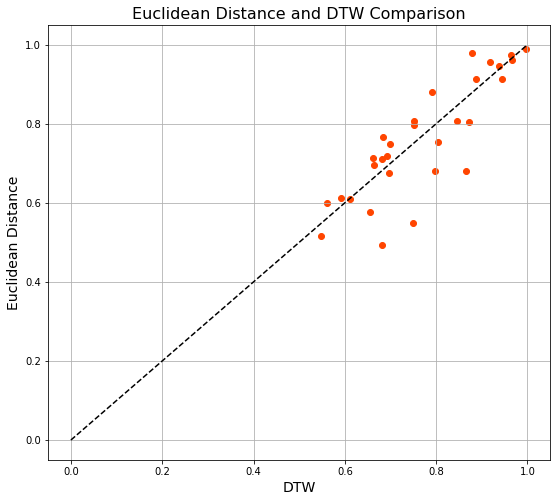

In [12]:
compare_acc(report["one_ed_acc"], report["one_dtw_acc"], "Euclidean Distance", "DTW")

Embedded is better than Euclidean Distance in 62.50 of datasets.


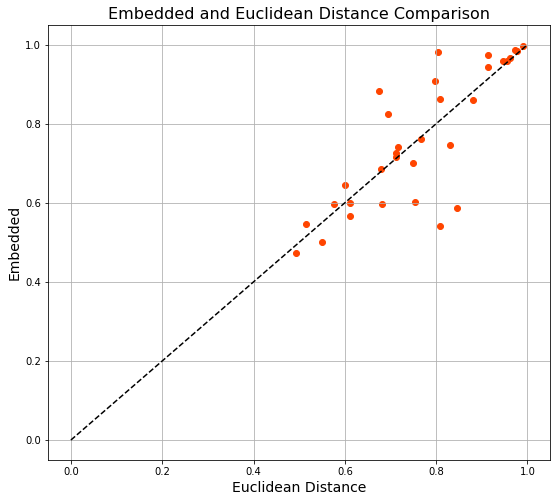

In [13]:
compare_acc(report["one_embedded_acc"], report["one_ed_acc"], "Embedded", "Euclidean Distance")

Embedded is better than DTW in 56.25 of datasets.


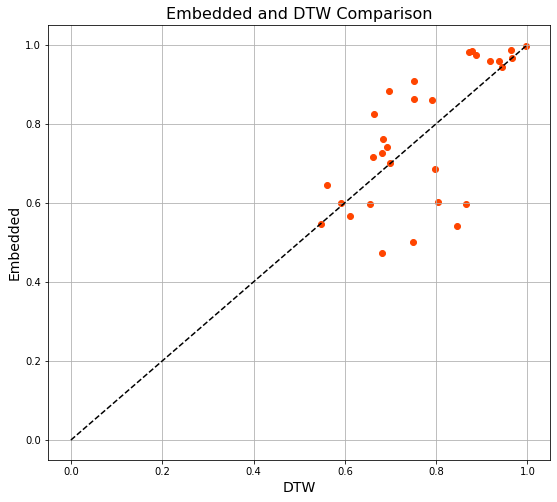

In [14]:
compare_acc(report["one_embedded_acc"], report["one_dtw_acc"], "Embedded", "DTW")

Text(0, 0.5, '%')

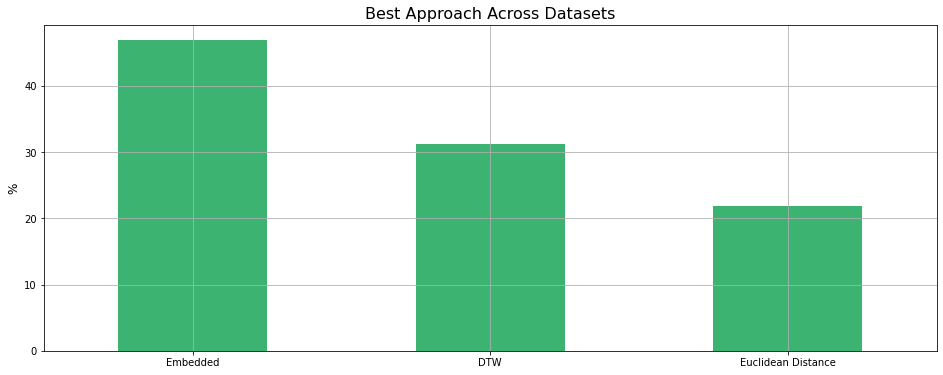

In [15]:
mapping = {0:"Euclidean Distance", 1:"DTW", 2:"Embedded"}
(report[["one_ed_acc",
        "one_dtw_acc",
        "one_embedded_acc"]].apply(lambda x: np.argmax(x),
                                   axis=1).map(mapping).value_counts(normalize=True) * 100).plot.bar(rot=0,
                                                                                              color="mediumseagreen",
                                                                                              grid=True,
                                                                                              figsize=(16, 6))
plt.title("Best Approach Across Datasets", fontsize=16)
plt.ylabel("%", fontsize=12)

Text(0.5, 1.0, 'Embedded Accuracy Standard Deviation - Histogram')

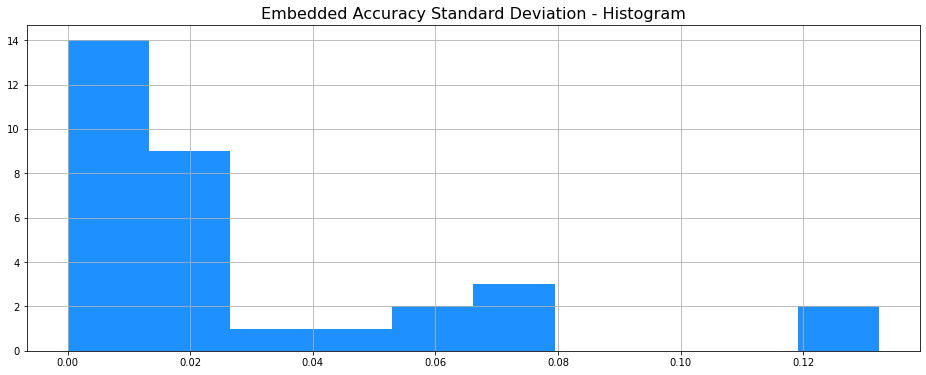

In [16]:
report["std_one_embedded_acc"].hist(bins=10, color="dodgerblue", figsize=(16, 6))

plt.title("Embedded Accuracy Standard Deviation - Histogram", fontsize=16)

## 3 NN Metrics

Euclidean Distance is better than DTW in 40.62 of datasets.


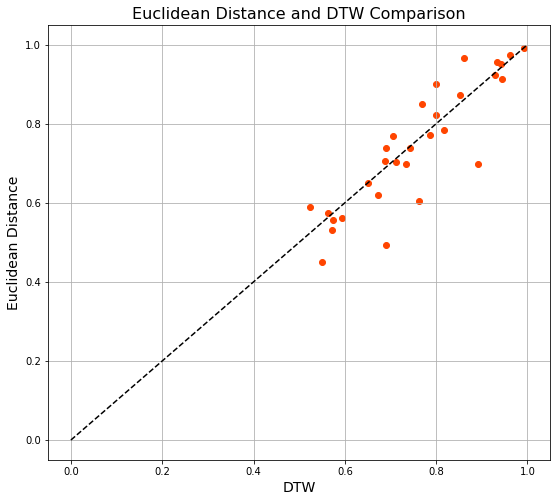

In [17]:
compare_acc(report["three_ed_acc"], report["three_dtw_acc"], "Euclidean Distance", "DTW")

Embedded is better than Euclidean Distance in 65.62 of datasets.


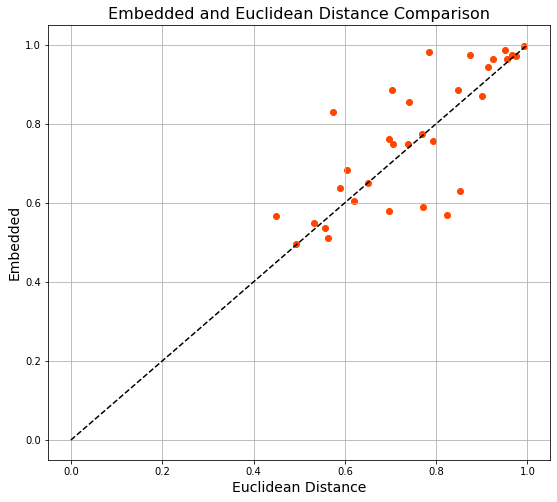

In [18]:
compare_acc(report["three_embedded_acc"], report["three_ed_acc"], "Embedded", "Euclidean Distance")

Embedded is better than DTW in 62.50 of datasets.


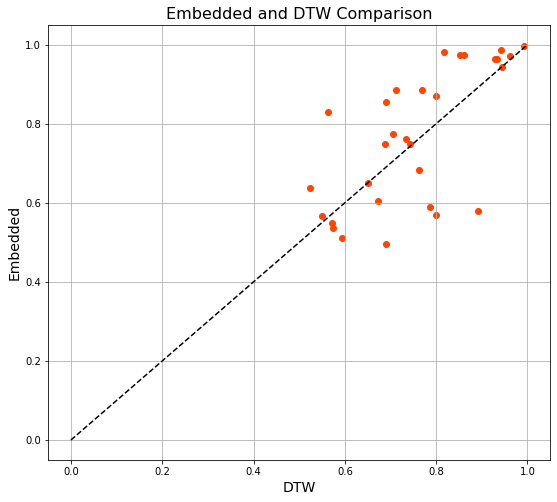

In [19]:
compare_acc(report["three_embedded_acc"], report["three_dtw_acc"], "Embedded", "DTW")

Text(0, 0.5, '%')

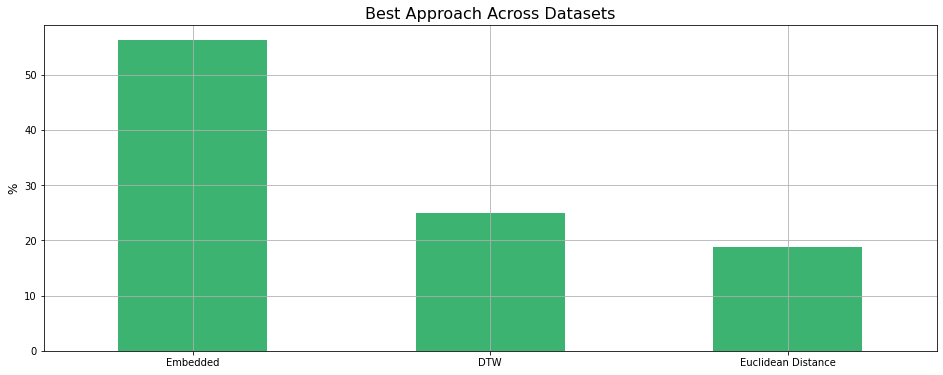

In [20]:
mapping = {0:"Euclidean Distance", 1:"DTW", 2:"Embedded"}
(report[["three_ed_acc",
        "three_dtw_acc",
        "three_embedded_acc"]].apply(lambda x: np.argmax(x),
                                   axis=1).map(mapping).value_counts(normalize=True) * 100).plot.bar(rot=0,
                                                                                              color="mediumseagreen",
                                                                                              grid=True,
                                                                                              figsize=(16, 6))
plt.title("Best Approach Across Datasets", fontsize=16)
plt.ylabel("%", fontsize=12)

Text(0.5, 1.0, 'Embedded Accuracy Standard Deviation - Histogram')

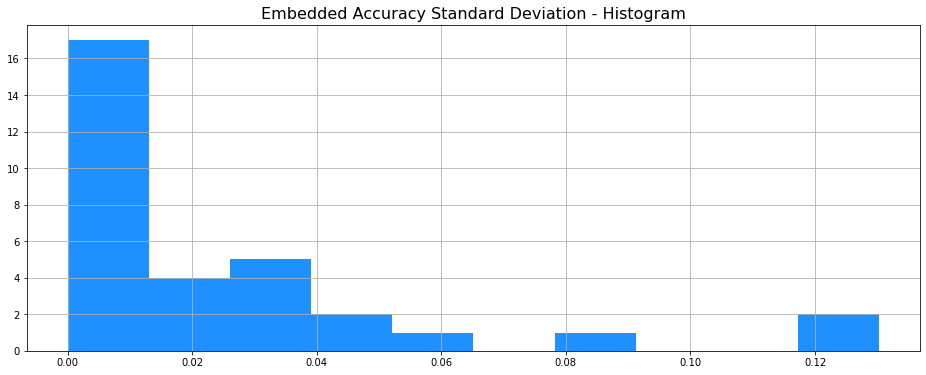

In [21]:
report["std_three_embedded_acc"].hist(bins=10, color="dodgerblue", figsize=(16, 6))

plt.title("Embedded Accuracy Standard Deviation - Histogram", fontsize=16)

## Best of (1 or 3 NN)

Euclidean Distance is better than DTW in 53.12 of datasets.


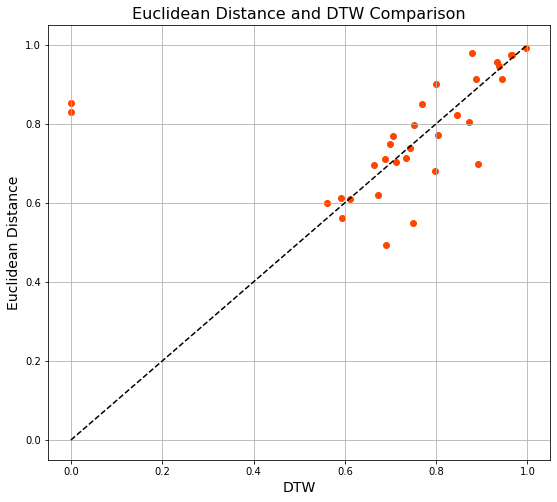

In [22]:
compare_acc(report["best_ed"], report["best_dtw"], "Euclidean Distance", "DTW")

Embedded is better than Euclidean Distance in 62.50 of datasets.


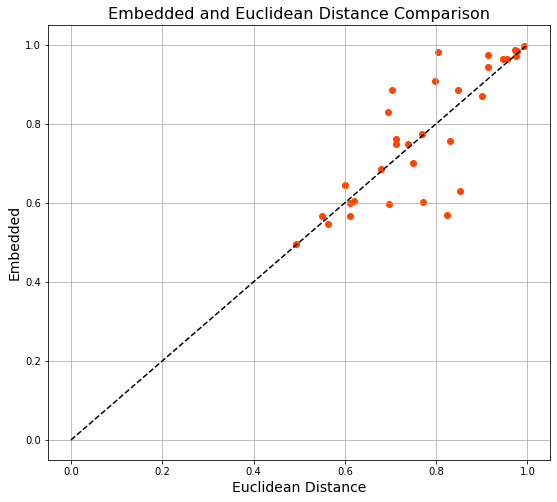

In [23]:
compare_acc(report["best_embedded"], report["best_ed"], "Embedded", "Euclidean Distance")

Embedded is better than DTW in 65.62 of datasets.


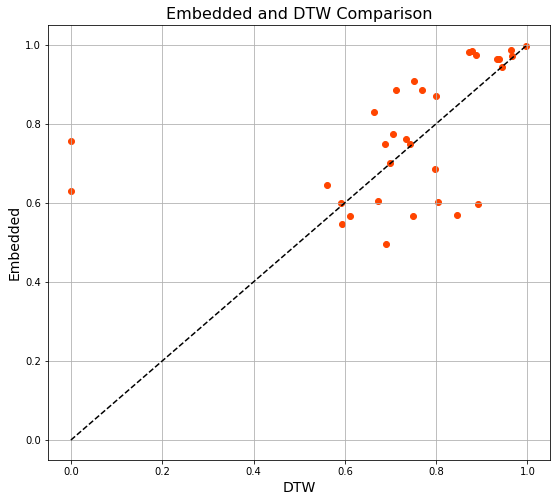

In [24]:
compare_acc(report["best_embedded"], report["best_dtw"], "Embedded", "DTW")

Text(0, 0.5, '%')

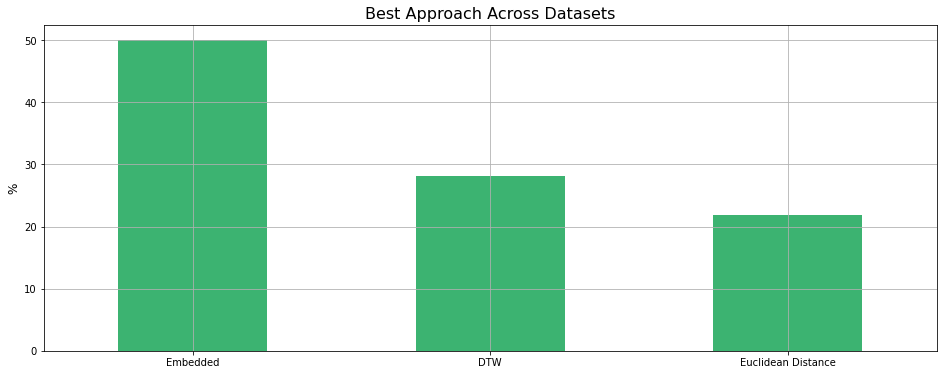

In [25]:
mapping = {0:"Euclidean Distance", 1:"DTW", 2:"Embedded"}
(report[["best_ed",
        "best_dtw",
        "best_embedded"]].apply(lambda x: np.argmax(x),
                                   axis=1).map(mapping).value_counts(normalize=True) * 100).plot.bar(rot=0,
                                                                                              color="mediumseagreen",
                                                                                              grid=True,
                                                                                              figsize=(16, 6))
plt.title("Best Approach Across Datasets", fontsize=16)
plt.ylabel("%", fontsize=12)